In [1]:
import glob
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
from scipy import signal
import scipy
from scipy.ndimage import gaussian_filter1d
import matplotlib.lines as mlines


# Loading the data

In [2]:
#Sea-level curves
geo_wave_100=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e2))
rounding=2

A25m=25/2 #This means amplitude is -12.5 and +12.5
A50m=50/2 #This means amplitude is -25 and +25
A100m=100/2#This means amplitude is -50 and +50
f_0_1Ma=-10e6/.1e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_0_5Ma=-10e6/.5e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_5Ma=-10e6/5e6 

#path='/live/share/Badlands_simulations'
# Loading the files with the metrics e.g. flexure, accumulation
Delta_SL0_Te50=pd.read_csv ('extracted_results/Synthetic/Delta_SL0_Te50.csv',sep=',', header=0)
Delta_SL_f5Myr_A25m_Te50=pd.read_csv('extracted_results/Synthetic/Delta_SL_f5Myr_A25m_Te50.csv', sep=',',header=0)
Delta_SL_f500Kyr_A25m_Te50=pd.read_csv ('extracted_results/Synthetic/Delta_SL_f500Kyr_A25m_Te50.csv',sep=',', header=0)

#Loading the sea level curves
Delta_SL_f5Myr_A25m=pd.read_csv('../../2_model_running/data/f5Myr_A25m.csv', sep=' ',header=None)
Delta_SL_f500Kyr_A25m=pd.read_csv('../../2_model_running/data/f500Kyr_A25m.csv', sep=' ',header=None)


sims=[Delta_SL0_Te50,Delta_SL_f5Myr_A25m_Te50, Delta_SL_f500Kyr_A25m_Te50]


In [3]:
#Spectral analysis
nperseg=99
nperseg=99
#Power spectra - Sea level
freqA25mf0_1Ma_1e2, psdA25mf0_1Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_1Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf5Ma_1e2, psdA25mf5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m, nperseg = nperseg)

# Power spectra and detrending - Flexure
SW_Delta_SL_f5Myr_A25m_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.Flexure_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.Flexure_m[20:-1]),nperseg = nperseg)

# Power spectra and detrending - River mouth distance
SW_Delta_SL_f5Myr_A25m_Te50_drm_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.River_mouth_Lengh_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.River_mouth_Lengh_m[20:-1]),nperseg = nperseg)

# Power spectra and detrending - Accumulation
SW_Delta_SL_f5Myr_A25m_Te50_acc_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.Accumulation_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_acc_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.Accumulation_m[20:-1]),nperseg = nperseg)


In [4]:
#normalization function
def normalized(x, xmin, xmax):
    try:
        normalized = (x- xmin)/(xmax - xmin)
    except ZeroDivisionError:
        percentage = float('inf')
    return normalized

In [5]:
#Finding the global min and max

min_flex=np.zeros(len(sims))
max_flex=np.zeros(len(sims))
min_dist=np.zeros(len(sims))
max_dist=np.zeros(len(sims))

sigma=[6,4,1]
for i in np.arange(0,len(sims), 1):
    min_flex[i]=min(gaussian_filter1d(sims[i].Flexure_m,sigma[i]))
    max_flex[i]=max(gaussian_filter1d(sims[i].Flexure_m,sigma[i]))
    min_dist[i]=min(gaussian_filter1d(sims[i].X[1:-1],sigma[i]))
    max_dist[i]=max(gaussian_filter1d(sims[i].X[1:-1],sigma[i]))
    

#calculating the maximum rate of flexure
max_rate_flex= np.zeros(len(sims))
#mm/yr
for i in np.arange(0,len(sims), 1):
    max_rate_flex[i]=abs(np.round((min_flex[i]*1e3)/(12*1e6),3))
    
max_rate_flex

array([0.103, 0.075, 0.074])

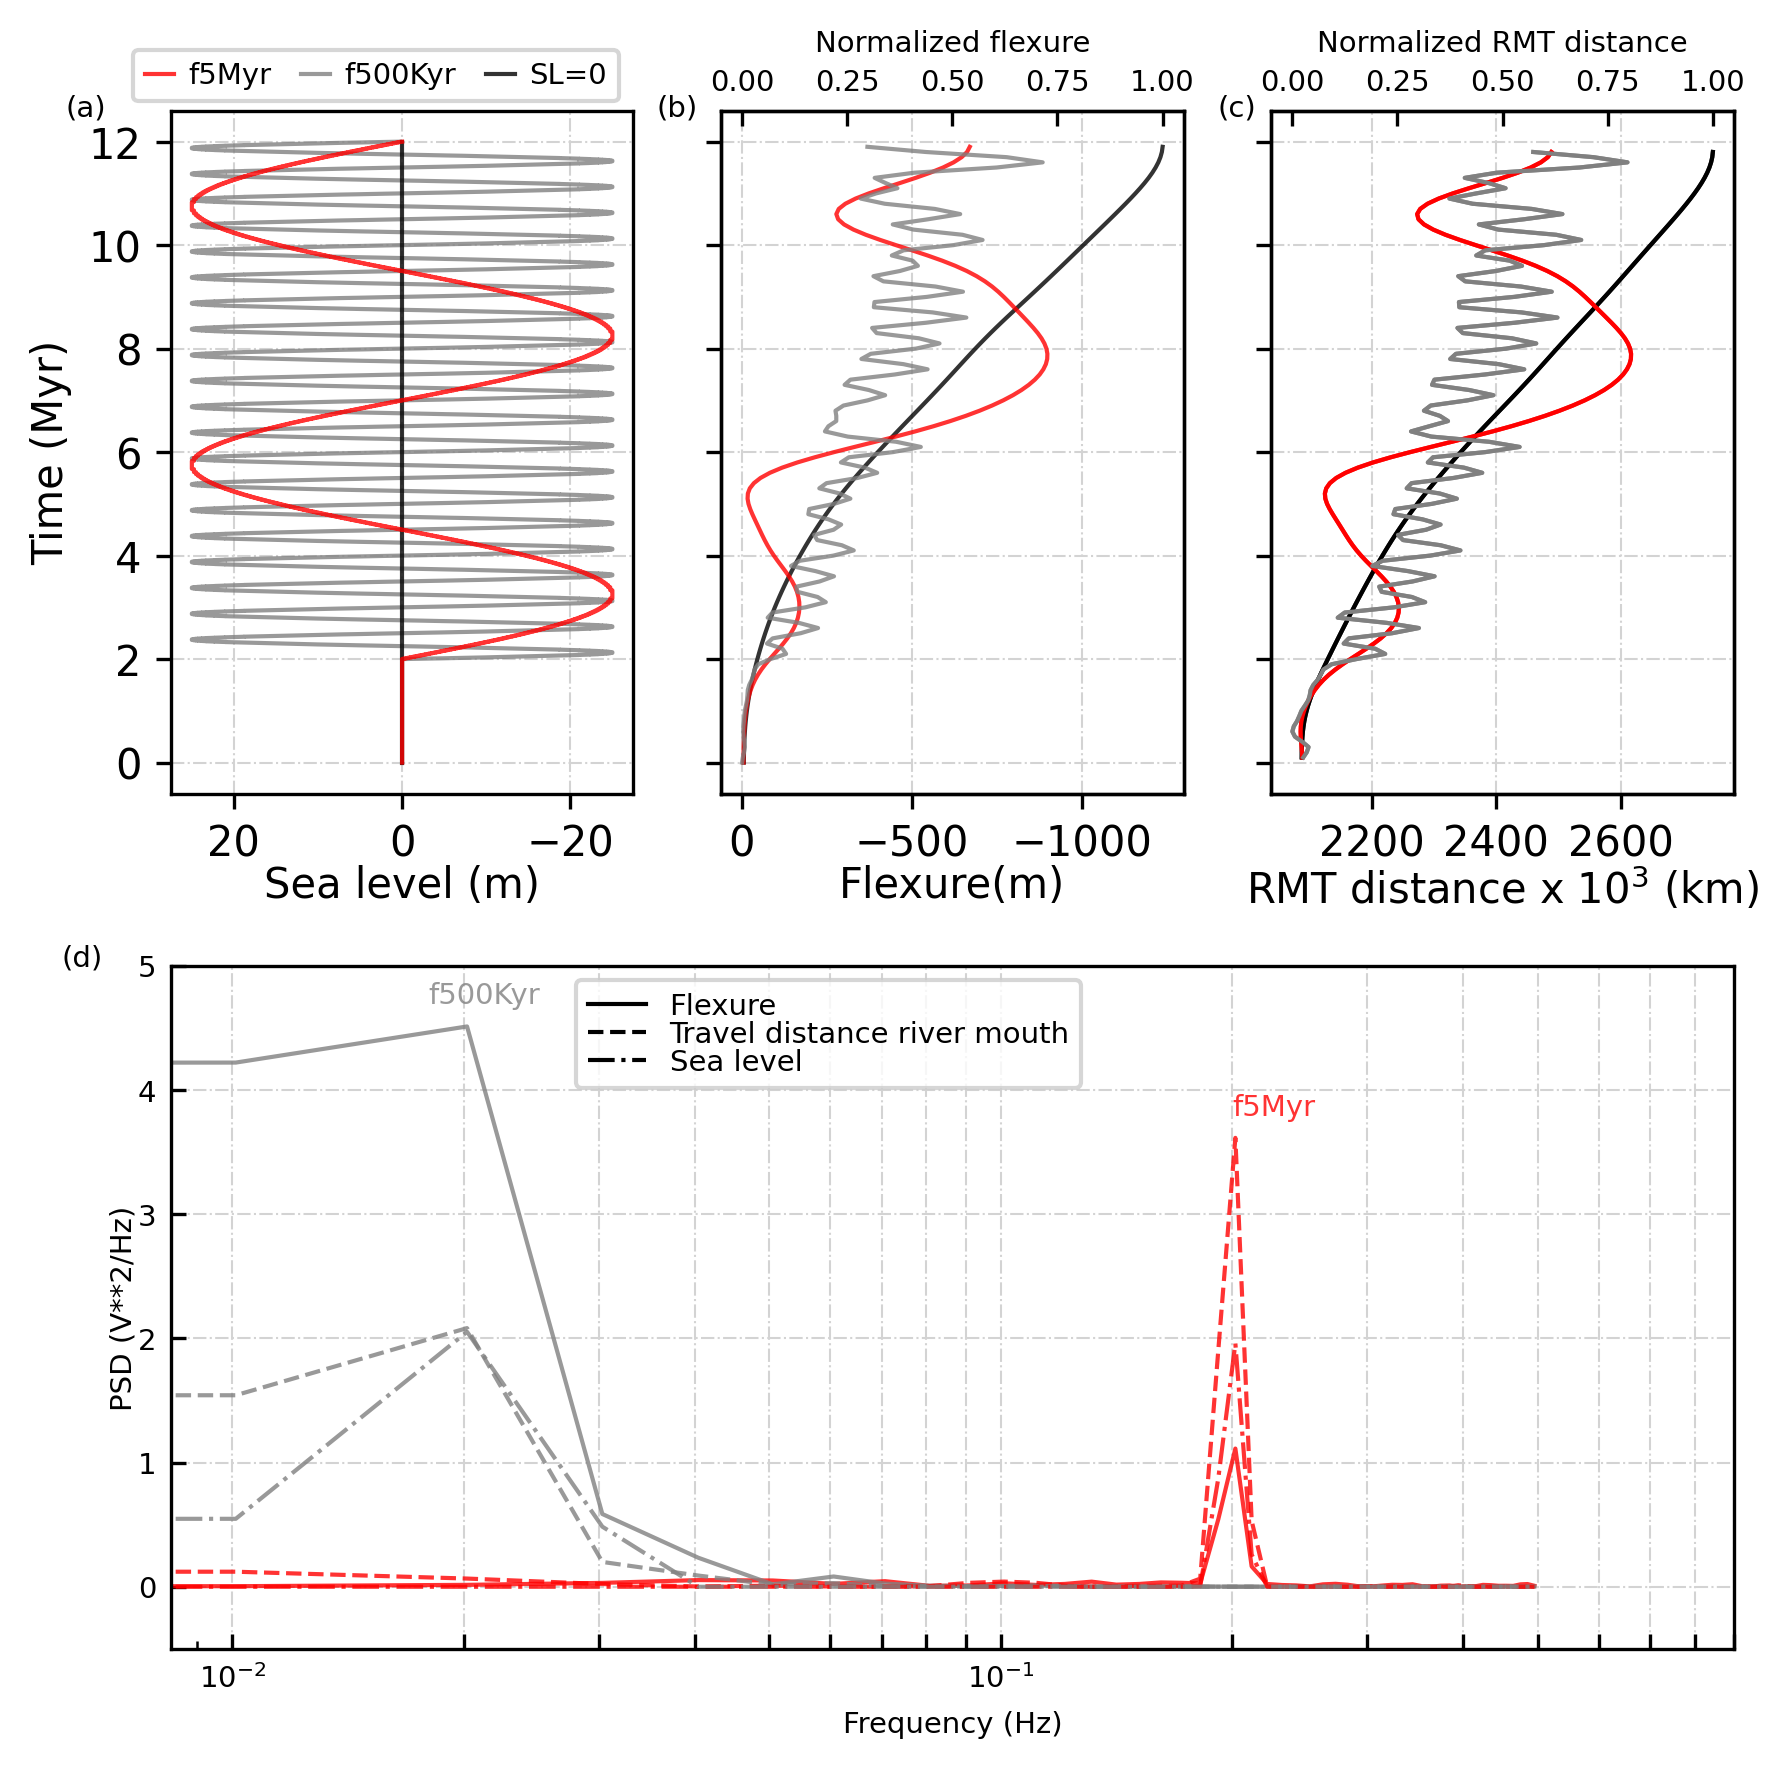

In [6]:
#Flexure&normalize flexure, power spectra at the bottom

nrows=2; ncols=3

fig,axes = plt.subplots(nrows=nrows,ncols=ncols, figsize = (15/2.54, 15/2.54), dpi=300, sharey=True)
colors=['black',  'red','grey']
plt.rc("font", size=7); plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42
abc=['(a)', '(b)', '(c)']
xabc=[40,250,1.95e3]
alpha=0.8
sigma=[6,4,1]

nfile=len(Delta_SL0_Te50.X)
ts=np.arange(0,nfile,1)
realtime=(ts*10e6)/100

SLf=1e-4
Ff=1e-6
DRMf=1e-12

###########
#First row#
###########
#Sea level
axes.flatten()[0].plot(Delta_SL_f5Myr_A25m[1],Delta_SL_f5Myr_A25m[0]/1e6, color=colors[1], linewidth=1, alpha=alpha, label='f5Myr', zorder=3) 
axes.flatten()[0].plot(Delta_SL_f500Kyr_A25m[1],Delta_SL_f500Kyr_A25m[0]/1e6, color=colors[2], linewidth=1, alpha=alpha, label='f500Kyr') 
axes.flatten()[0].plot([0, 0],[0, 12], color=colors[0], linewidth=1, alpha=alpha, label='SL=0')

for i in np.arange(0,len(sims), 1):
    axes.flatten()[1].plot(gaussian_filter1d(sims[i].Flexure_m,sigma[i]), realtime/1e6,
                        color=colors[i], linewidth=1, alpha=alpha) 
    axes.flatten()[i].text(xabc[i], 12.5, str(abc[i]))


ax1t = axes.flatten()[1].twiny() 
for i in np.arange(0,len(sims), 1):
    ax1t.plot(normalized(gaussian_filter1d(sims[i].Flexure_m,sigma[i])
                        , min(min_flex)
                        , max(max_flex)), realtime/1e6,
            color=colors[i], linewidth=1, alpha=0, ) 

for i in np.arange(0,len(sims), 1):
    axes.flatten()[2].plot(gaussian_filter1d(sims[i].X[1:-1]/1e3,sigma[i]), realtime[1:-1]/1e6,
                        color=colors[i], linewidth=1, alpha=alpha) 

ax2t = axes.flatten()[2].twiny() 
for i in np.arange(0,len(sims), 1):
    ax2t.plot(normalized(gaussian_filter1d(sims[i].X[1:-1],sigma[i])
                        , min(min_dist)
                        , max(max_dist)), realtime[1:-1]/1e6,
            color=colors[i], linewidth=1, alpha=1 ) 
# Top Legend 
axes.flatten()[0].legend(bbox_to_anchor=[1,1.11], ncol=3,
                         labelspacing=0.1, columnspacing=1, handlelength=1, handletextpad=0.5)
axes.flatten()[0].set_ylabel('Time (Myr)')

###############
#Power spectra#
###############
axb=plt.subplot2grid((nrows,ncols),(nrows-1,0), colspan=3)
#Flexure
axb.semilogx(SW_Delta_SL_f500Kyr_A25m_Te50_f_dt[0], SW_Delta_SL_f500Kyr_A25m_Te50_f_dt[1]*Ff, c='red', linewidth=1, alpha=alpha, label='f5Myr flexure')
axb.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_f_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_f_dt[1]*Ff, c='grey', linewidth=1, alpha=alpha, label='f500Kyr flexure')
#Distance to river mouth
axb.semilogx(SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt[0], SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt[1]*DRMf,'--', linewidth=1, alpha=alpha,c='red', label='f5Myr river mouth')
axb.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_drm_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_drm_dt[1]*DRMf, '--', linewidth=1, alpha=alpha, c='grey', label='f500Kyr river mouth')
#Sea level
axb.semilogx(freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2*SLf,'-.', label='f5Myr Sea Level', c='red', linewidth=1, alpha=alpha)
axb.semilogx(freqA25mf5Ma_1e2, psdA25mf5Ma_1e2*SLf, '-.', label='f500Kyr Sea Level', c='grey', linewidth=1, alpha=alpha)
axb.text(0.018,4.7, 'f500Kyr', color='grey',  alpha=alpha)
axb.text(0.2,3.8, 'f5Myr', color='red' , alpha=alpha)
axb.set_xlabel('Frequency (Hz)')
axb.set_ylabel('PSD (V**2/Hz)',labelpad=0.10)
axb.set_ylim([-0.5, 5])

############
##Formating#
############
axb.text(6e-3,5, s='(d)')
axb.set_xticks(np.append(np.arange(1e-2, 1e-1, 1e-2), np.arange(1e-1, 1e-0, 1e-1)))
axb.tick_params(direction= 'in', which='both')
axb.grid(color='lightgrey', linestyle='-.', linewidth=0.5)


# Bottom Legend 
sea_level = mlines.Line2D([], [], color='k', linestyle='-.', linewidth=1, label='Sea level')
flexure= mlines.Line2D([], [], color='k',linewidth=1, label='Flexure')
distance= mlines.Line2D([], [], color='k',linestyle='--', linewidth=1,label='Travel distance river mouth')
axb.legend(bbox_to_anchor=[0.25,1],handles=[flexure, distance,sea_level],  labelspacing=0.001)


ax1t.tick_params(direction= 'in', which='both')
ax2t.tick_params(direction= 'in', which='both')
#ax2t.tick_params([])

ax1t.set_xlabel('Normalized flexure') 
ax2t.set_xlabel('Normalized RMT distance') 


xlabels= ['Sea level (m)', 'Flexure(m)', 'RMT distance x $10^3$ (km)', '', 'Flexural departure (m)', 'RMT distance departure (km)']
for i in np.arange(0, ncols*nrows,1):
    #axes.flatten()[i].tick_params(direction= 'in', which='both')
    axes.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    if i<=1:
        axes.flatten()[i].invert_xaxis()

    if i<=5:
        axes.flatten()[i].set_xlabel(str(xlabels[i]), labelpad=0.01)
    
fig.tight_layout()

fig.savefig('./images/Fig6_NormalizedFlexure&Power_spectra_synthetic_simulations.jpg')